In [2]:
#LSTM 사용하여 버튼 하나의 x좌표 예측

import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [3]:
np.random.seed(7) #결과를 재현할 수 있도록 난수 시드 수정
data1=pd.read_excel('x_data.xls') #x좌표 엑셀 데이터 불러옴 
data2=pd.read_excel('y_data.xls') #x좌표 엑셀 데이터 불러옴 
data3=pd.read_excel('speed.xls') #x좌표 엑셀 데이터 불러옴 

pddata1=pd.DataFrame(data1) 
pddata1.head()
pddata2=pd.DataFrame(data2) 
pddata2.head()
pddata3=pd.DataFrame(data3) 
pddata3.head()

hap=[] #진짜 합
for j in range(len(pddata1)):
    x_data=np.array(pddata1.loc[j])
    y_data=np.array(pddata2.loc[j])
    s_data=np.array(pddata3.loc[j])

    hap1=[] #[x,y,속력] 데이터를 저장하고 있는 리스트

    for i in range(len(s_data)): 
        sum=[] #리스트 하나당 임시로 x,y,속력을 저장할 리스트 (for문 돌릴때마다 초기화)
        sum.append(x_data[i]) #x넣음
        sum.append(y_data[i]) #y넣음
        sum.append(s_data[i]) #속력넣음
        hap1.append(sum) #[x,y,속력] 하나의 리스트를 hap리스트에 넣음  

    j = j + 1
    
    hap.append(hap1)

n1 = np.array(hap)
print(n1.shape) #257,99,3 257개의 샘플과 99개 시계열, 3개 피쳐(x,y,속력)


(257, 99, 3)


In [4]:
num_sample = n1.shape[0] # 257개 샘플 데이터
num_sequence = n1.shape[1] # 99개 시계열 데이터
num_feature = n1.shape[2] #3개 피쳐

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler() #클래스의 인스턴스 생성


# #시계열 선회하면서 피팅함
# for ss in range(num_sequence):
#     scaler.partial_fit(n1[:,ss,:])
    
# #Numpy 활용하여 3차원 데이터 스케일링(변환) 0~1 스케일링
# results=[]
# for ss in range(num_sequence):
#     results.append(scaler.transform(n1[:,ss,:]).reshape(num_sample,1,num_feature))
# n1_scaled = np.concatenate(results, axis=1)

# dataset=  n1_scaled
dataset=  n1

In [5]:
dataset

array([[[388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        ...,
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ]],

       [[210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        ...,
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   2.        ]],

       [[563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        ...,
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ]],

       ...,

      

In [6]:
train_size = int(len(dataset) * 0.67) #학습 데이터 67%
test_size = len(dataset) - train_size #테스트 데이터 33%
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# look_back = 1 #이전 시간 단계 입력변수
# #X는 지금 t 값이고, Y는 그 다음의 t+1 값임 (즉, X=t, Y=t+1)
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# LSTM 모델은 입력데이터 X에 [samples, time steps, features]형식으로 넣어야함
# 현재 데이터는 [samples, features]이므로, numpy.reshape()를 사용하여
#준비된 train과 test 입력 데이터를 3차원으로 바꿈
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



# # dataframe=pd.DataFrame(hap)
# dataframe=pd.DataFrame(data1) #DataFrame은 2차원 테이블 데이터 구조 자료형

# dataset = dataframe.values #데이터 프레임에서 numpy배열 추출

# dataset = dataset.astype('float32') #정수값을 부동 소수점 값으로 변환
# # LSTM 은 S자형(기본값) 또는 tanh활성화 기능을 사용할 떄 입력 데이터의 스케일에 민감
# scaler = MinMaxScaler(feature_range=(0, 1)) #정규화함 (0에서 1까지의 범위로 데이터 크기 조정)
# dataset = scaler.fit_transform(dataset.reshape(-1,1))
#reshape함수를 사용하여 1차원 데이터를 2차원으로 변경

# dataset=  n1_scaled

# train_size = int(len(dataset) * 0.67) #학습 데이터 67%
# test_size = len(dataset) - train_size #테스트 데이터 33%
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#두개의 인수, 데이터 세트로 변환하려는 Numpt 배열인 dataset과 다음 시간을 예측하기
#위해 입력 변수로 사용할 이전 시간 단계 수인 look_back을 사용. 기본값을 1

# look_back = 1 #이전 시간 단계 입력변수
# #X는 지금 t 값이고, Y는 그 다음의 t+1 값임 (즉, X=t, Y=t+1)
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# # LSTM 모델은 입력데이터 X에 [samples, time steps, features]형식으로 넣어야함
# # 현재 데이터는 [samples, features]이므로, numpy.reshape()를 사용하여
# #준비된 train과 test 입력 데이터를 3차원으로 바꿈
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [7]:
train

array([[[388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        ...,
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ]],

       [[210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        ...,
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   2.        ]],

       [[563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        ...,
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ]],

       ...,

      

In [8]:
test

array([[[333.        , 252.        ,   0.        ],
        [333.        , 252.        ,   0.        ],
        [333.        , 252.        ,   0.        ],
        ...,
        [496.        , 380.        ,  10.29563014],
        [505.        , 385.        ,   0.        ],
        [505.        , 385.        ,   8.60232527]],

       [[590.        , 481.        ,   0.        ],
        [590.        , 481.        ,   0.        ],
        [590.        , 481.        ,   0.        ],
        ...,
        [373.        , 425.        ,   6.32455532],
        [367.        , 423.        ,   0.        ],
        [367.        , 423.        ,   2.82842712]],

       [[361.        , 417.        ,   0.        ],
        [361.        , 417.        ,   0.        ],
        [361.        , 417.        ,   0.        ],
        ...,
        [311.        , 368.        ,   0.        ],
        [311.        , 368.        ,   9.43398113],
        [303.        , 363.        ,   0.        ]],

       ...,

      

In [9]:
np.shape(train)

(172, 99, 3)

In [10]:
np.shape(test)

(85, 99, 3)

In [11]:
len(dataset)

257

In [12]:
#배열을 행렬로 변한
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[] 
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back):]
        dataX.append(a)
        dataY.append(dataset[i:(i + look_back):])
    
    dataX=np.squeeze(dataX,axis=1) #차원 축소
    dataY=np.squeeze(dataY,axis=1) #차원 축소
    return np.array(dataX), np.array(dataY)

In [13]:
#두개의 인수, 데이터 세트로 변환하려는 Numpy 배열인 dataset과 다음 시간을 예측하기
#위해 입력 변수로 사용할 이전 시간 단계 수인 look_back을 사용. 기본값을 1
#reshpae()함수를 사용하여 배열의 차원을 변경할 수 있음

look_back = 1 #이전 시간 단계 입력변수
#X는 지금 t 값이고, Y는 그 다음의 t+1 값임 (즉, X=t, Y=t+1)
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# LSTM 모델은 입력데이터 X에 [samples, time steps, features]형식으로 넣어야함
# 현재 데이터는 [samples, features]이므로, numpy.reshape()를 사용하여
#준비된 train과 test 입력 데이터를 3차원으로 바꿈
# trainX = np.reshape(trainX.shape[0], trainX.shape[1], trainX.shape[2])
# testX = np.reshape(testX.shape[0], testX.shape[1], testX.shape[2])

In [14]:
np.shape(trainX)

(170, 99, 3)

In [15]:
np.shape(testX)

(83, 99, 3)

In [16]:
train

array([[[388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        ...,
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ]],

       [[210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        ...,
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   2.        ]],

       [[563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        ...,
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ]],

       ...,

      

In [17]:
trainY

array([[[388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        [388.        , 252.        ,   0.        ],
        ...,
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ],
        [224.        , 357.        ,   0.        ]],

       [[210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        [210.        , 371.        ,   0.        ],
        ...,
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   0.        ],
        [335.        , 426.        ,   2.        ]],

       [[563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        [563.        , 328.        ,   0.        ],
        ...,
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ],
        [407.        , 433.        ,   0.        ]],

       ...,

      

In [18]:
from keras.layers import TimeDistributed
from keras.layers import InputLayer
from keras.layers import Reshape

model = Sequential() # Sequeatial Model 

model.add(LSTM(32, activation='relu',return_sequences=True, input_shape=trainX.shape[-2:]))  
# 20: 메모리 셀의 개수 input_shape: (timestep, feature) 
model.add(Dense(3, activation='softmax')) # 3개의 예측

model.compile(loss='mean_squared_error', optimizer='adam') 

model.fit(trainX, trainY, epochs=5,batch_size=10, validation_split=0.2, verbose=1)

model.summary()

Train on 136 samples, validate on 34 samples
Epoch 1/5
136/136 [==============================] - 1s 9ms/step - loss: 115509.2599 - val_loss: 125629.2344
Epoch 2/5
136/136 [==============================] - 1s 4ms/step - loss: 115503.4342 - val_loss: 125626.0161
Epoch 3/5
136/136 [==============================] - 1s 4ms/step - loss: 115494.4143 - val_loss: 125615.1893
Epoch 4/5
136/136 [==============================] - 1s 4ms/step - loss: 115491.4824 - val_loss: 125617.7151
Epoch 5/5
136/136 [==============================] - 1s 4ms/step - loss: 115491.2919 - val_loss: 125616.7872
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 99, 32)            4608      
_________________________________________________________________
dense_1 (Dense)              (None, 99, 3)             99        
Total params: 4,707
Trainable params: 4,707
Non-trainable 

In [19]:
model.fit(trainX, trainY, epochs=5,batch_size=30, verbose=1)

Epoch 1/5
170/170 [==============================] - 0s 1ms/step - loss: 117515.6319
Epoch 2/5
170/170 [==============================] - 0s 1ms/step - loss: 117516.7546
Epoch 3/5
170/170 [==============================] - 0s 1ms/step - loss: 117514.6245
Epoch 4/5
170/170 [==============================] - 0s 1ms/step - loss: 117509.6172
Epoch 5/5
170/170 [==============================] - 0s 1ms/step - loss: 117506.7312


In [25]:
print("정확도: ",(model.evaluate(trainX, trainY)))
print("정확도: ",(model.evaluate(testX, testY)))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print('y: ',testY,', predict: ',model.predict(trainX).flatten())

170/170 [==============================] - 0s 773us/step
정확도:  117506.47959558823
83/83 [==============================] - 0s 890us/step
정확도:  116160.99303463855
y:  [[[333.         252.           0.        ]
  [333.         252.           0.        ]
  [333.         252.           0.        ]
  ...
  [496.         380.          10.29563014]
  [505.         385.           0.        ]
  [505.         385.           8.60232527]]

 [[590.         481.           0.        ]
  [590.         481.           0.        ]
  [590.         481.           0.        ]
  ...
  [373.         425.           6.32455532]
  [367.         423.           0.        ]
  [367.         423.           2.82842712]]

 [[361.         417.           0.        ]
  [361.         417.           0.        ]
  [361.         417.           0.        ]
  ...
  [311.         368.           0.        ]
  [311.         368.           9.43398113]
  [303.         363.           0.        ]]

 ...

 [[514.         637.          

In [20]:
# 예측

# nsamples, nx, ny=trainX.shape
# trainX=trainX.reshape((nsamples,nx*ny))
# nsamples, nx, ny=testX.shape
# testX=testX.reshape((nsamples,nx*ny))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# #Numpy 활용하여 3차원 데이터 스케일링(변환) 0~1 스케일링
# results=[]
# for ss in range(num_sequence):
#     results.append(scaler.transform(n1[:,ss,:]).reshape(num_sample,1,num_feature))
# n1_scaled = np.concatenate(results, axis=1)

# dataset=  n1_scaled

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# #inverse_trasform()함수를 사용하여 스케일링된 결과 값을 본래 값으로 구함
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY]) 
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

ValueError: Found input variables with inconsistent numbers of samples: [99, 170]

ValueError: x and y can be no greater than 2-D, but have shapes (257,) and (257, 99, 3)

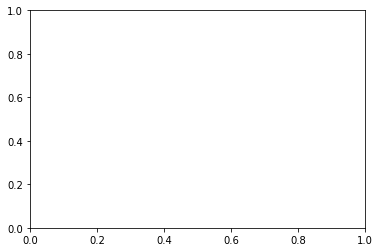

In [24]:
#원래 데이터셋 : 파란색, 테스트 데이터셋 : 녹색 #훈련 데이터셋 : 주황색
#train 예측 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset)) #전체 데이터
plt.plot(dataset) 
# plt.show()
plt.plot(trainPredictPlot) #초반 부분 train 데이터
plt.show()
plt.plot(testPredictPlot) #후반 부분 test 데이터
plt.show()

plt.plot(dataset) #전체 데이터
plt.plot(trainPredictPlot) #초반 부분 train 데이터
plt.plot(testPredictPlot) #후반 부분 test 데이터
plt.show()